In [1]:


import pandas as pd 


train=pd.read_csv('https://drive.google.com/uc?export=download&id=1KA7mKUmQv4PrF-qMFrH35LN6q_i56Bf1', dtype={'StateHoliday':'str'})

store=pd.read_csv('https://drive.google.com/uc?export=download&id=1_o04Vnqzo3v-MTk20MF3OMw2QFz0Fbo0')

In [2]:
from datetime import datetime

train['Date'] = train.apply(lambda x : datetime.strptime(x['Date'],"%Y-%m-%d"),axis = 1 )

train = pd.merge(train,store,on = ['Store'])



In [3]:
train = train.fillna(0)


 

In [4]:
train['Open'] = train.apply(lambda x : 1 if x["Open"] == 0  else 0 , axis = 1)

In [5]:
train.boxplot(['Sales'],by = "PromoInterval")
'''
비슷 한 것으로 보아 삭제 시킴 

'''

'\n비슷 한 것으로 보아 삭제 시킴 \n\n'

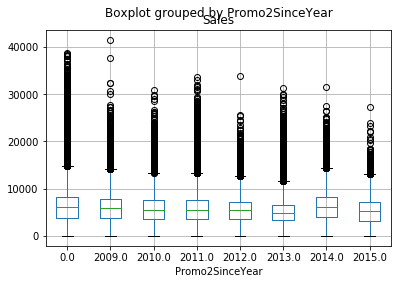

In [6]:
train.boxplot(['Sales'],by = "Promo2SinceYear")

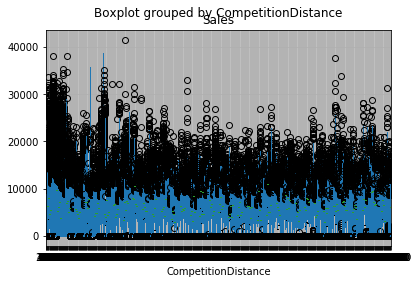

In [7]:
train.boxplot(['Sales'],by = "CompetitionDistance")

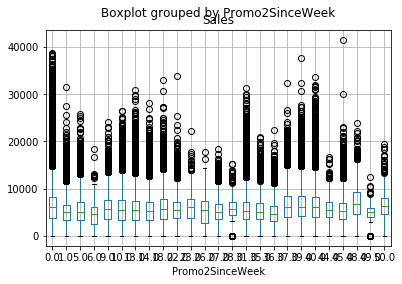

In [8]:
train.boxplot(['Sales'],by = "Promo2SinceWeek")

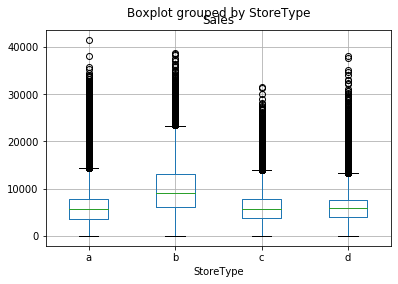

In [9]:
train.boxplot(['Sales'],by = "StoreType")

In [8]:
dummy = pd.get_dummies(train['StoreType'],prefix = "Store_type",drop_first = False)
print(dummy)

train = pd.concat([train.drop(['StoreType'],axis = "columns"),dummy],axis = 1 )



         Store_type_a  Store_type_b  Store_type_c  Store_type_d
0                   0             0             1             0
1                   0             0             1             0
2                   0             0             1             0
3                   0             0             1             0
4                   0             0             1             0
5                   0             0             1             0
6                   0             0             1             0
7                   0             0             1             0
8                   0             0             1             0
9                   0             0             1             0
10                  0             0             1             0
11                  0             0             1             0
12                  0             0             1             0
13                  0             0             1             0
14                  0             0     

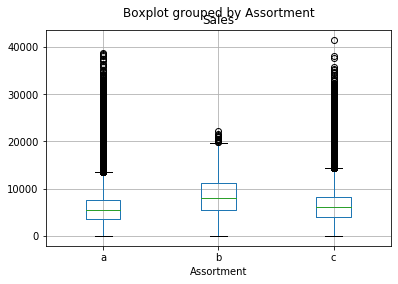

In [11]:
train.boxplot(['Sales'],by = "Assortment")

In [9]:
train['Assortment'] = train.apply(lambda x : 1 if x["Assortment"] == "b" else 0 ,axis = 1)

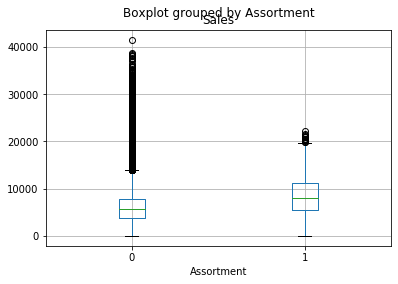

In [13]:
train.boxplot(['Sales'],by = "Assortment")

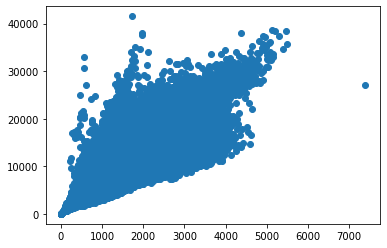

In [14]:
import matplotlib.pyplot as plt 


plt.scatter(train.Customers , train.Sales)



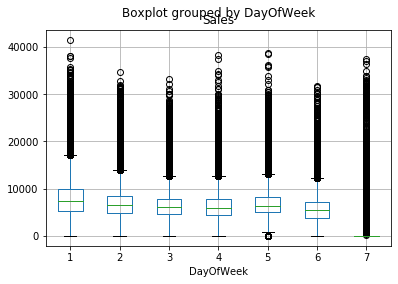

In [15]:
train.boxplot(['Sales'],by = "DayOfWeek")




In [10]:
train['DayOfWeek'] = train.apply(lambda x : 0 if x["DayOfWeek"] ==7 else 1 ,axis = 1)

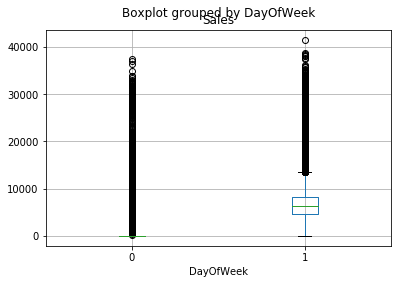

In [17]:
train.boxplot(['Sales'],by = "DayOfWeek")




In [11]:
train = train.drop(['PromoInterval', 'Promo2SinceYear' ,'CompetitionDistance', 'Promo2SinceWeek'], axis = "columns")

In [12]:

t_year = train.apply(lambda x : datetime(int(x['CompetitionOpenSinceMonth']),1,1) if int(x['CompetitionOpenSinceMonth']) > 0 else 0 ,axis = 1 )



In [20]:

t_month = train.apply(lambda x : datetime(int(x['CompetitionOpenSinceMonth']),1,1) if int(x['CompetitionOpenSinceMonth']) > 0 else 0 ,axis = 1 )



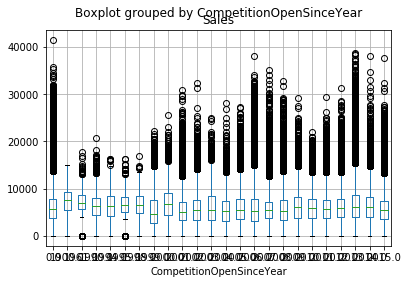

In [21]:
train.boxplot(['Sales'] , by = "CompetitionOpenSinceYear" )

In [22]:
train = train.drop(['CompetitionOpenSinceYear','CompetitionOpenSinceMonth'], axis = "columns")

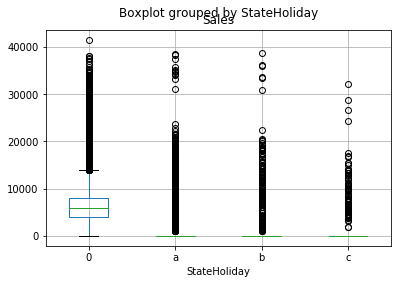

In [23]:
train.StateHoliday.unique()

train.boxplot(['Sales'] , by = "StateHoliday" )

In [24]:
train['StateHoliday'] = train.apply(lambda x : 1 if x["StateHoliday"] in ["a","b","c"] else 0 ,axis = 1)

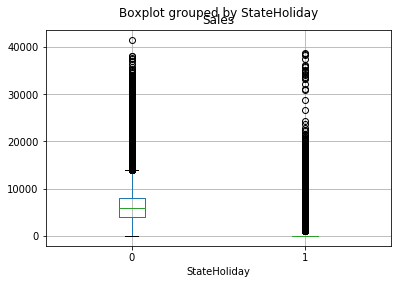

In [25]:

train.boxplot(['Sales'] , by = "StateHoliday" )

In [26]:

from sklearn.model_selection import KFold , StratifiedKFold , GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np 

test = train[train['Date'] > datetime(2014,12,31)]
train = train[train['Date']<= datetime(2014,12,31)]
train = train.drop(['Date','Store'], axis = "columns")
test = test.drop(['Date','Store'], axis = "columns")
lin = LinearRegression()




X = train.drop(['Sales'],axis = "columns").values
y = train["Sales"].values

test_X = test.drop(['Sales'],axis = "columns").values
test_y = test["Sales"].values



In [27]:
dic = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0}
dic2 = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0}

dic[2]

0

In [30]:
dic = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0}





for i in range(2,21):

    
    accc = []
    k_fold = KFold(n_splits = i)
    for train_index , test_index in k_fold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lin.fit(X_train,y_train)

        pred = lin.predict(test_X)



        accuracy = r2_score(test_y,pred)



        accc.append(accuracy)
    
    
    
    a = np.array(accc)
    dic[i] = np.mean(a)
    


print(dic)




0.8877286591058182
0.8882520110466302
[0.8877286591058182, 0.8882520110466302]
0.8893990306785363
0.8904462001815289
0.8900044760970394
[0.8893990306785363, 0.8904462001815289, 0.8900044760970394]
0.8897259012043301
0.8898419507864683
0.8894541967276883
0.8908282212220027
[0.8897259012043301, 0.8898419507864683, 0.8894541967276883, 0.8908282212220027]
0.8898131302015708
0.8897474013301233
0.8907861650510626
0.8891461264170166
0.8907848507324684
[0.8898131302015708, 0.8897474013301233, 0.8907861650510626, 0.8891461264170166, 0.8907848507324684]
0.889759295881925
0.8900596567772563
0.8899200216338813
0.8907045069966575
0.8901514157648476
0.8906494763589113
[0.889759295881925, 0.8900596567772563, 0.8899200216338813, 0.8907045069966575, 0.8901514157648476, 0.8906494763589113]
0.8898057078587293
0.890398211001223
0.89031756654752
0.8905768668608578
0.8893756663248338
0.8906314752824626
0.8904471988685861
[0.8898057078587293, 0.890398211001223, 0.89031756654752, 0.8905768668608578, 0.8893756

In [31]:

dic2 = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0}

for i in range(2,21):

    
    accc = []
    

    skf = StratifiedKFold(n_splits=i)
    n_iter = 0 


    for train_index , test_index in skf.split(X,y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lin.fit(X_train,y_train)

        pred = lin.predict(test_X)


        
        accuracy = r2_score(test_y,pred)
    
        accc.append(accuracy)
    
    
    a = np.array(accc)
    dic2[i] = np.mean(a)
    

    
print(dic2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least

{1: 0, 2: 0.8889637821232004, 3: 0.8900666550491337, 4: 0.890241974401744, 5: 0.8902967962020842, 6: 0.8903482098930673, 7: 0.890376102164189, 8: 0.8903882539780155, 9: 0.890401501166182, 10: 0.8904077054681027, 11: 0.8904139124890894, 12: 0.8904184878858196, 13: 0.8904209996743396, 14: 0.8904237505985917, 15: 0.8904258022472374, 16: 0.8904274431926971, 17: 0.8904288475891002, 18: 0.8904300489593547, 19: 0.8904311693365873, 20: 0.8904319450744381}


In [ ]:
train